## LIB

In [4]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

## IMPORT

In [2]:
DATA_DIR = 'web_app/Human_protein_atlas'

In [5]:
TRAIN_CSV = os.path.join(DATA_DIR, 'train.csv')

In [159]:
data_df = pd.read_csv(TRAIN_CSV)
data_df.head()

,Image,Label
0,19567,9
1,29993,6 4
2,17186,1 4
3,29600,6 2
4,701,3 4


In [13]:
s = data_df['Label'].tolist()

In [39]:
newList = []
for i in s:
    newList.append(i.split(' '))

In [57]:
Final = []
for i in range(len(newList)):
    if len(newList[i]) <1 :
        Final.append(int(newList[i]))
    else :
        for j in range(len(newList[i])):
            Final.append(int(newList[i][j]))

In [64]:
DataCount = Counter(Final)

In [85]:
DataCount.items()

dict_items([(9, 1278), (6, 5711), (4, 9066), (1, 1752), (2, 2542), (3, 1977), (7, 2629), (0, 2088), (8, 1037), (5, 1109)])

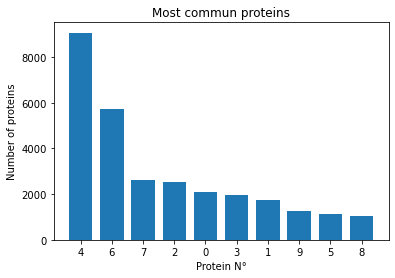

In [96]:
labels, values = zip(*Counter(Final).most_common())

indexes = np.arange(len(labels))
width = 0.75

plt.bar(indexes, values, width)
plt.xticks(indexes , labels)
plt.title("Most commun proteins")
plt.xlabel('Protein N°')
plt.ylabel('Number of proteins')
plt.show()

In [165]:
ProtDf = pd.DataFrame(list(DataCount.items()),columns=['Proteins', 'Count'])
ProtDf['Name'] = ["9-Nuclear speckles","6-Cytosol","4-Nucleoplasm","1-Nuclear bodies","2-Nucleoli","3-Golgi apparatus","7-Plasma membrane","0-Mitochondria","8-Centrosome","5-Nucleoli fibrillar center"]

In [166]:
ProtDf

,Proteins,Count,Name
0,9,1278,9-Nuclear speckles
1,6,5711,6-Cytosol
2,4,9066,4-Nucleoplasm
3,1,1752,1-Nuclear bodies
4,2,2542,2-Nucleoli
5,3,1977,3-Golgi apparatus
6,7,2629,7-Plasma membrane
7,0,2088,0-Mitochondria
8,8,1037,8-Centrosome
9,5,1109,5-Nucleoli fibrillar center


<AxesSubplot:xlabel='Count', ylabel='Name'>

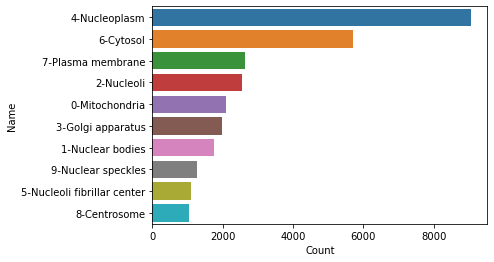

In [167]:
import seaborn as sns
sns.barplot(x="Count", y="Name", data=ProtDf,order=["4-Nucleoplasm","6-Cytosol","7-Plasma membrane","2-Nucleoli","0-Mitochondria","3-Golgi apparatus","1-Nuclear bodies","9-Nuclear speckles","5-Nucleoli fibrillar center","8-Centrosome"])

In [139]:
data_df.Label.str.split()

0           [9]
1        [6, 4]
2        [1, 4]
3        [6, 2]
4        [3, 4]
          ...  
19231       [6]
19232    [6, 7]
19233       [4]
19234       [5]
19235    [8, 4]
Name: Label, Length: 19236, dtype: object

In [160]:
data_df["0-Mitochondria"] = data_df["Label"].apply(lambda x: 1 if '0'in x else 0)
data_df["1-Nuclear bodies"] = data_df["Label"].apply(lambda x: 1 if '1'in x else 0)
data_df["2-Nucleoli"] = data_df["Label"].apply(lambda x: 1 if '2'in x else 0)
data_df["3-Golgi apparatus"] = data_df["Label"].apply(lambda x: 1 if '3'in x else 0)
data_df["4-Nucleoplasm"] = data_df["Label"].apply(lambda x: 1 if '4'in x else 0)
data_df["5-Nucleoli fibrillar center"] = data_df["Label"].apply(lambda x: 1 if '5'in x else 0)
data_df["6-Cytosol"] = data_df["Label"].apply(lambda x: 1 if '6'in x else 0)
data_df["7-Plasma membrane"] = data_df["Label"].apply(lambda x: 1 if '7'in x else 0)
data_df["8-Centrosome"] = data_df["Label"].apply(lambda x: 1 if '8'in x else 0)
data_df["9-Nuclear speckles"] = data_df["Label"].apply(lambda x: 1 if '9'in x else 0)

In [161]:
data_df.head()

,Image,Label,0-Mitochondria,1-Nuclear bodies,2-Nucleoli,3-Golgi apparatus,4-Nucleoplasm,5-Nucleoli fibrillar center,6-Cytosol,7-Plasma membrane,8-Centrosome,9-Nuclear speckles
0,19567,9,0,0,0,0,0,0,0,0,0,1
1,29993,6 4,0,0,0,0,1,0,1,0,0,0
2,17186,1 4,0,1,0,0,1,0,0,0,0,0
3,29600,6 2,0,0,1,0,0,0,1,0,0,0
4,701,3 4,0,0,0,1,1,0,0,0,0,0


In [162]:
dfCorr = data_df.drop(["Image","Label"], axis=1)

In [163]:
dfCorr.corr()

,0-Mitochondria,1-Nuclear bodies,2-Nucleoli,3-Golgi apparatus,4-Nucleoplasm,5-Nucleoli fibrillar center,6-Cytosol,7-Plasma membrane,8-Centrosome,9-Nuclear speckles
0-Mitochondria,1.000000,-0.090131,-0.058688,-0.115900,-0.140305,-0.062649,-0.173346,-0.112079,-0.064056,-0.071615
1-Nuclear bodies,-0.090131,1.000000,-0.097915,-0.075603,-0.095095,-0.072872,-0.053448,-0.084921,-0.061163,-0.082996
2-Nucleoli,-0.058688,-0.097915,1.000000,-0.069891,0.008286,-0.094543,-0.076503,-0.094481,-0.070717,-0.083758
3-Golgi apparatus,-0.115900,-0.075603,-0.069891,1.000000,-0.059937,-0.065352,-0.111267,-0.084325,-0.067904,-0.067604
4-Nucleoplasm,-0.140305,-0.095095,0.008286,-0.059937,1.000000,-0.056153,-0.032280,-0.082483,-0.019710,-0.225530
5-Nucleoli fibrillar center,-0.062649,-0.072872,-0.094543,-0.065352,-0.056153,1.000000,-0.067489,-0.082830,-0.047192,-0.052551
6-Cytosol,-0.173346,-0.053448,-0.076503,-0.111267,-0.032280,-0.067489,1.000000,-0.052511,-0.058885,-0.073752
7-Plasma membrane,-0.112079,-0.084921,-0.094481,-0.084325,-0.082483,-0.082830,-0.052511,1.000000,-0.056109,-0.049627
8-Centrosome,-0.064056,-0.061163,-0.070717,-0.067904,-0.019710,-0.047192,-0.058885,-0.056109,1.000000,-0.054437
9-Nuclear speckles,-0.071615,-0.082996,-0.083758,-0.067604,-0.225530,-0.052551,-0.073752,-0.049627,-0.054437,1.000000


<AxesSubplot:>

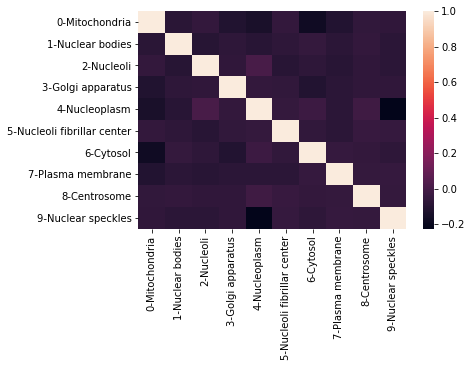

In [173]:
sns.heatmap(dfCorr.corr())